In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim

from wordcloud import WordCloud
from collections import Counter
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from nltk import word_tokenize
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Exploratory Data Analysis

## TripAdvisor

In [16]:
# Read in csv files
cities = pd.read_csv("/content/drive/MyDrive/Priceline/JintongYu/city_list.csv", usecols=['city_name'])
ta = pd.read_csv("/content/drive/MyDrive/Priceline/JintongYu/combo.csv", usecols=['combo_des'])

# Combine these 2 data frame so that each cell with text data can be assigned to an identifier, i.e. city name
city_ta = pd.concat([cities, ta], axis=1)

In [17]:
city_ta.head()

,city_name,combo_des
0,ROME,historic site ancient ruin ancient ruin archit...
1,BARCELONA,landmark architectural building landmark archi...
2,ISTANBUL,historic site architectural building historic ...
3,MILAN,religious site church cathedral landmark archi...
4,FLORENCE,landmark art museum historic walking area hist...


In [19]:
# Convert the data frame to a corpus
# Create a list of documents
doc_city_ta = city_ta['combo_des'].tolist()

# Tokenize the documents
tok_city_ta = [doc.split() for doc in doc_city_ta]

# Create a dictionary from the tokenized documents
dic_city_ta = corpora.Dictionary(tok_city_ta)

# Convert to a corpus
corp_city_ta = [dic_city_ta.doc2bow(doc) for doc in tok_city_ta]

### Word Frequency Analysis

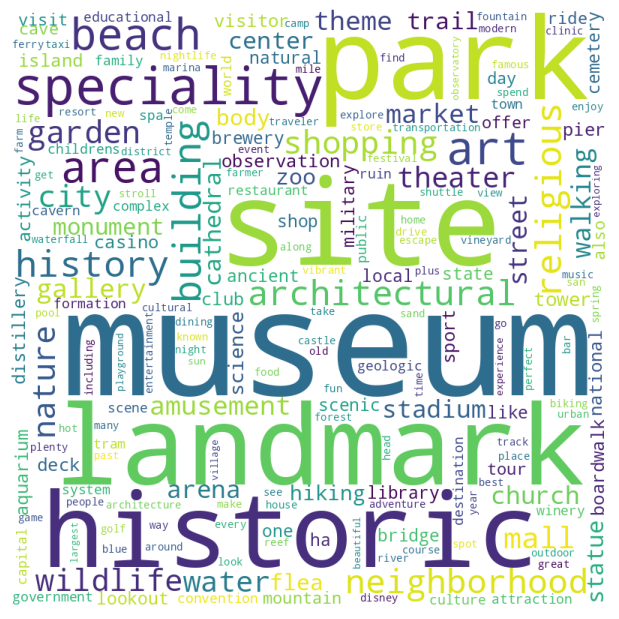

In [20]:
# Raw Frequency
# Concatenate the text data from all rows into a single string
text = ' '.join(city_ta['combo_des'].astype(str).tolist())

# Use a Counter object to count the frequency of each word
word_count = Counter(text.split())

# Set a fixed random state value
np.random.seed(42)

# Generate the word cloud with the frequency information
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate_from_frequencies(word_count)

# Visualize the word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [23]:
# TF-IDF (Term Frequency-Inverse Document Frequency): it takes into account the frequency of a word in a particular documents as well as the frequency of the word across all documents
# Create a TF-IDF model from the corpus
#tfidf_model_ta = TfidfModel(corp_city_ta)

# Apply the TF-IDF model to the corpus
#tfidf_corpus_ta = tfidf_model_ta[corp_city_ta]

In [35]:
# Download the 'punkt' module for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<ipython-input-40-65a33c85d0d6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bigram_freq.index[:20], rotation=45, ha='right')


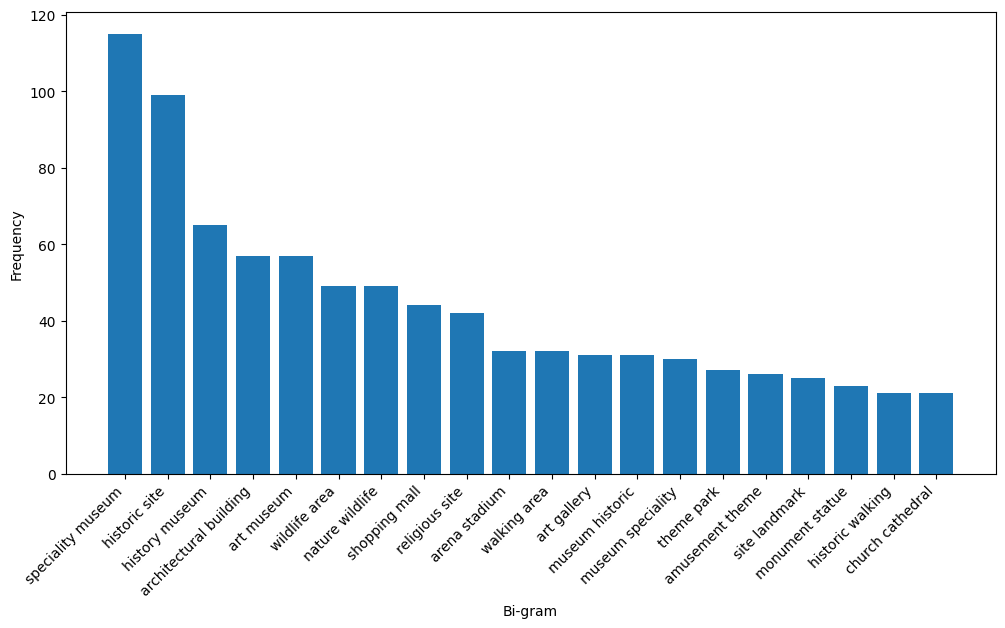

In [40]:
# Bi-grams
# Create a new column to store tokenized text
city_ta['tokens'] = city_ta['combo_des'].apply(lambda x: word_tokenize(x))

# Create a list of all the bi-grams in the corpus
bigram_measures = BigramAssocMeasures()
all_bigrams = []
for tokens in city_ta['tokens']:
  finder = BigramCollocationFinder.from_words(tokens)
  finder.apply_freq_filter(2) # Only include bi-grams that appear at least twice
  bigrams = finder.nbest(bigram_measures.pmi, 50) # Get the top 50 bi-grams based on PMI (Pointwise Mutual Information: a measure of association between 2 words in a corpus)
  all_bigrams.extend(bigrams)

# Create a frequency distribution of the bi-grams
bigram_freq = pd.Series(all_bigrams).value_counts()

# Join the 2 words within a bi-gram for plotting
bigram_freq.index = bigram_freq.index.map(lambda x: ' '.join(x))

# Plot a bar graph to show the top 20 bi-grams by frequency
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(bigram_freq.index[:20], bigram_freq.values[:20])
ax.set_xticklabels(bigram_freq.index[:20], rotation=45, ha='right')
ax.set_xlabel('Bi-gram')
ax.set_ylabel('Frequency')
plt.show()

## Wikipedia

In [41]:
# Read in csv files
wk = pd.read_csv("/content/drive/MyDrive/Priceline/JintongYu/wiki_text.csv", usecols=['paragraph'])

# Combine these 2 data frame so that each cell with text data can be assigned to an identifier, i.e. city name
city_wk = pd.concat([cities, wk], axis=1)

In [42]:
city_wk.head()

,city_name,paragraph
0,ROME,caput mundilatinthe capital world rome italian...
1,BARCELONA,barcelona brslon barslohn catalanbslon spanish...
2,ISTANBUL,istanbul stnbl istanbuul u also stnbl istanbuu...
3,MILAN,milan mln milan u also mln milahn lombard mil ...
4,FLORENCE,florence flrns florrnss italian firenze firnts...


In [43]:
# Convert the data frame to a corpus
# Create a list of documents
doc_city_wk = city_wk['paragraph'].tolist()

# Tokenize the documents
tok_city_wk = [doc.split() for doc in doc_city_wk]

# Create a dictionary from the tokenized documents
dic_city_wk = corpora.Dictionary(tok_city_wk)

# Convert to a corpus
corp_city_wk = [dic_city_wk.doc2bow(doc) for doc in tok_city_wk]

### Word Frequency Analysis

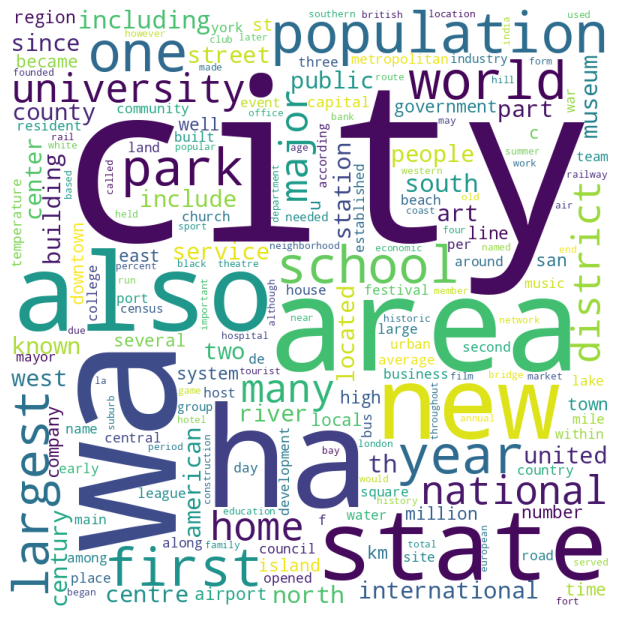

In [46]:
# Raw Frequency
# Concatenate the text data from all rows into a single string
text_wk = ' '.join(city_wk['paragraph'].astype(str).tolist())

# Use a Counter object to count the frequency of each word
word_count_wk = Counter(text_wk.split())

# Set a fixed random state value
np.random.seed(0)

# Generate the word cloud with the frequency information
wordcloud_wk = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud_wk.generate_from_frequencies(word_count_wk)

# Visualize the word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud_wk)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
# TF-IDF (Term Frequency-Inverse Document Frequency): it takes into account the frequency of a word in a particular documents as well as the frequency of the word across all documents
# Create a TF-IDF model from the corpus
#tfidf_model_wk = TfidfModel(corp_city_wk)

# Apply the TF-IDF model to the corpus
#tfidf_corpus_wk = tfidf_model_wk[corp_city_wk]

<ipython-input-47-6de78778ba9f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bigram_freq_wk.index[:20], rotation=45, ha='right')


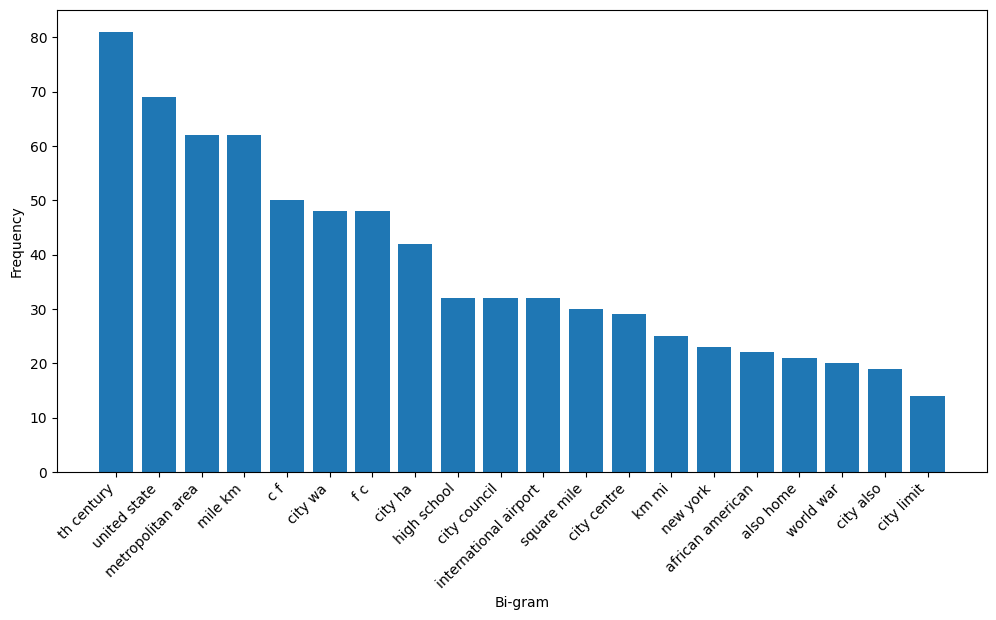

In [47]:
# Bi-grams
# Create a new column to store tokenized text
city_wk['tokens'] = city_wk['paragraph'].apply(lambda x: word_tokenize(x))

# Create a list of all the bi-grams in the corpus
bigram_measures = BigramAssocMeasures()
all_bigrams_wk = []
for tokens in city_wk['tokens']:
  finder_wk = BigramCollocationFinder.from_words(tokens)
  finder_wk.apply_freq_filter(5) # Only include bi-grams that appear at least 5 times
  bigrams_wk = finder_wk.nbest(bigram_measures.pmi, 50) # Get the top 50 bi-grams based on PMI (Pointwise Mutual Information: a measure of association between 2 words in a corpus)
  all_bigrams_wk.extend(bigrams_wk)

# Create a frequency distribution of the bi-grams
bigram_freq_wk = pd.Series(all_bigrams_wk).value_counts()

# Join the 2 words within a bi-gram for plotting
bigram_freq_wk.index = bigram_freq_wk.index.map(lambda x: ' '.join(x))

# Plot a bar graph to show the top 20 bi-grams by frequency
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(bigram_freq_wk.index[:20], bigram_freq_wk.values[:20])
ax.set_xticklabels(bigram_freq_wk.index[:20], rotation=45, ha='right')
ax.set_xlabel('Bi-gram')
ax.set_ylabel('Frequency')
plt.show()

# Topic Modeling

## TripAdvisor

## Wikipedia